In [1]:
# %pip install matplotlib numpy pandas scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cal = pd.read_csv('data/cal.csv')
mc = pd.read_csv('data/motion_control.csv')

In [4]:
cal.head()

,Unnamed: 0.1,Unnamed: 0,frametimes,RawFluor
0,0,0,5.659791,36.701600
1,2,2,5.709763,36.754626
2,4,4,5.759754,37.057993
3,6,6,5.809746,36.973267
4,8,8,5.859758,36.848768


In [6]:
cal = cal.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [7]:
cal.head()

,frametimes,RawFluor
0,5.659791,36.701600
1,5.709763,36.754626
2,5.759754,37.057993
3,5.809746,36.973267
4,5.859758,36.848768


In [8]:
mc = mc.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [9]:
mc.head()

,frametimes,RawFluorIso
0,5.684818,11.008354
1,5.734810,10.961639
2,5.784781,10.980323
3,5.834793,10.958737
4,5.884785,10.999560


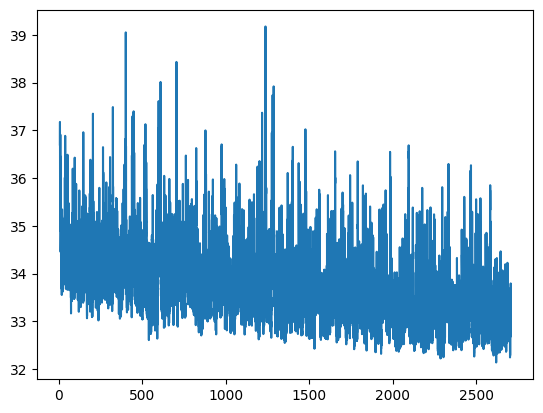

In [10]:
plt.plot(cal['frametimes'], cal['RawFluor'])

Applying low pass filter

In [13]:
cal['frametimes'][1] - cal['frametimes'][0]

np.float64(0.04997119999999988)

In [17]:
1. / np.round(cal['frametimes'][2] - cal['frametimes'][1], 2)

np.float64(20.0)

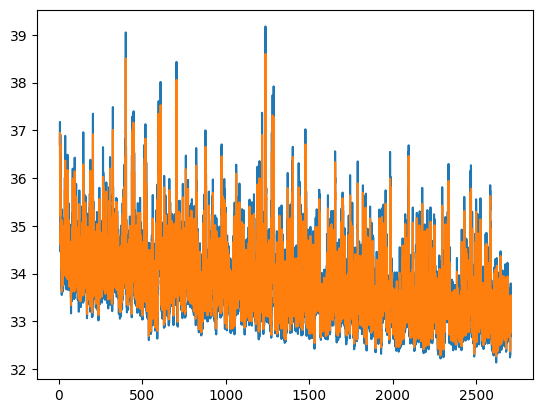

In [27]:
from scipy.signal import medfilt, butter, filtfilt
b, a = butter(1, 2, btype='low', fs=20)
cal_denoise = filtfilt(b,a, cal['RawFluor'])
plt.plot(cal['frametimes'], cal['RawFluor'])
plt.plot(cal['frametimes'], cal_denoise)

(500.0, 560.0)

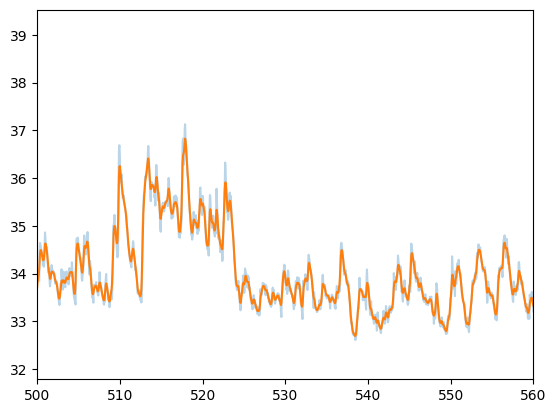

In [33]:
plt.plot(cal['frametimes'], cal['RawFluor'], alpha=0.3)
plt.plot(cal['frametimes'], cal_denoise)
plt.xlim(500, 560)

In [54]:
from scipy.stats import linregress
from scipy.optimize import curve_fit, minimize

def double_exponential(t, const, amp_fast, amp_slow, tau_slow, tau_multiplier):
    tau_fast = tau_slow*tau_multiplier
    return const+amp_slow*np.exp(-t/tau_slow)+amp_fast*np.exp(-t/tau_fast)

max_sig = np.max(cal_denoise)
inital_params = [max_sig/2, max_sig/4, max_sig/4, 3600, 0.1]
bounds = ([0      , 0      , 0      , 600  , 0],
          [max_sig, max_sig, max_sig, 36000, 1])
dLight_parms, parm_cov = curve_fit(double_exponential, cal['frametimes'], cal_denoise, 
                                  p0=inital_params, bounds=bounds, maxfev=1000)
trend = double_exponential(cal['frametimes'], *dLight_parms)

(500.0, 600.0)

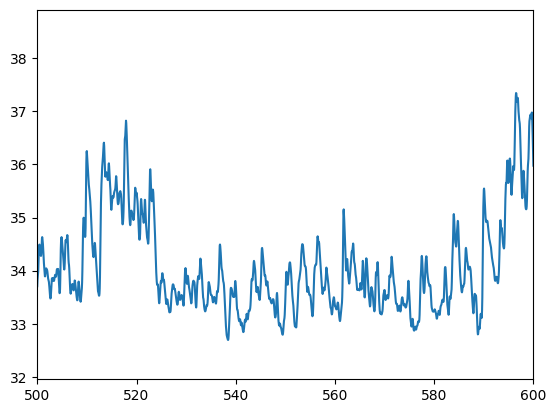

In [57]:
plt.plot(cal['frametimes'], cal_denoise)
plt.xlim(500, 600)

(500.0, 600.0)

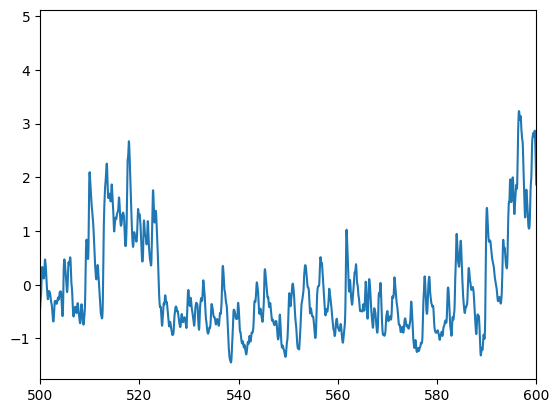

In [56]:
cal_detrend = cal_denoise - trend
plt.plot(cal['frametimes'], cal_detrend)
plt.xlim(500, 600)

Reading stimulus timestamps

In [62]:
stim = pd.read_csv('data/stimulus.csv')
stim = stim.drop(columns=['Unnamed: 0'])
stim.head()

,0
0,305.764823
1,371.762053
2,436.762440
3,509.760840
4,589.764710


In [69]:
stims = stim["0"].values
cal_times = cal['frametimes'].values

(1500.0, 1800.0)

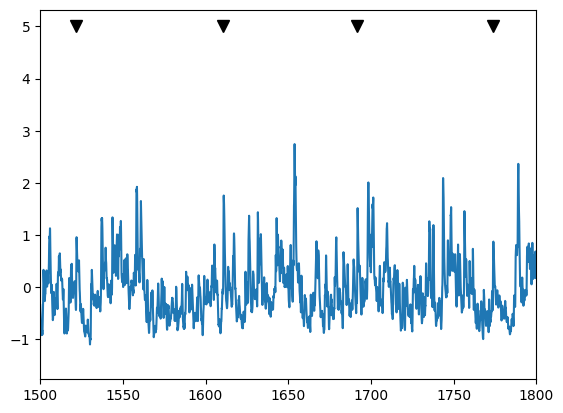

In [75]:
plt.plot(cal_times, cal_detrend)
plt.plot(stims, np.full(np.size(stims), 5.0), color='w', marker="v", mfc='k', mec='k', ms=8)
plt.xlim(1500, 1800)

In [77]:
indices = np.searchsorted(cal_times, stims)
segments = np.split(cal_detrend, indices)

c:\Users\sangeetha\mambaforge\envs\calim\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [82]:
len(stims), len(segments)

(30, 31)

In [88]:
segments[2].values

array([-0.64042407, -0.36671565, -0.05797812, ..., -0.49360924,
       -0.37983058, -0.11089148], shape=(1300,))

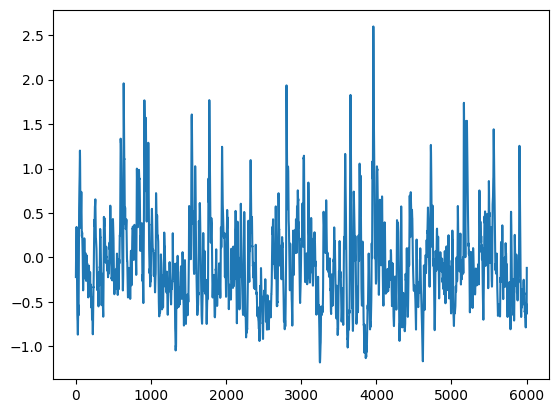

In [102]:
plt.plot(segments[0].values)

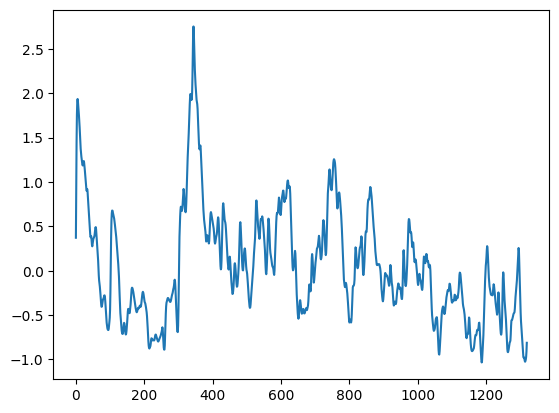

In [103]:
plt.plot(segments[1].values)